# **Secion1: Import Liberaries and dataset:**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skewnorm
import kagglehub

# For training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
sns.set_style('whitegrid')

mushroom = pd.read_csv('/content/sample_data/mushrooms.csv')
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# **Section2: Exploratory Data Analysis**

**Class**

*   e = edible     (0)
*   p =poisonous   (1)


**Cap_Shape**

*   b = bell
*   c = conical
*   x = convex
*   f = flat
*   k = knobbed
*   s = sunken

**Cap_Surface**

*   f = fibrous
*   g = grooves
*   y = scaly
*   s = smooth

**Cap_Colour**

*   n = brown
*   b = buff
*   c = cinnamon
*   g = gray
*   r = green
*   p = pink
*   u = purple
*   e = red
*   w = white
*   y = yellow

**Bruises**

*   t = yes
*   f = no

**Odor**

*   a = almond
*   l = anise
*   c = creosote
*   y = fishy
*   f = foul
*   m = musty

**Gill_Attatchment**

*   a = attached
*   d = descending
*   f = free
*   n = notched

**Gill_Spacing**

*   c = close
*   w = crowded
*   d = distant

**Gill_Size**

*   b = broad
*   n = narrow

**Gill_Colour**

*   k = black
*   n = brown
*   b = buff
*   h = chocolate
*   g = gray
*   r = green
*   o = orange
*   p = pink
*   u = purple
*   e = red
*   w = white
*   y = yellow















In [ ]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
len(mushroom)

8124

In [ ]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
mushroom.dtypes

,0
class,object
cap-shape,object
cap-surface,object
cap-color,object
bruises,object
odor,object
gill-attachment,object
gill-spacing,object
gill-size,object
gill-color,object


In [ ]:
mushroom.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
#Extract columns
cols = mushroom.columns
#Create empty list
new_cols = []
#iterate to fix issues with names
for column in cols:
    #to proper case
    proper_cols = column.title()
    #replace space/hyphen with underscore
    proper_cols_hyphen = proper_cols.replace(" ", "_")
    clean_col = proper_cols_hyphen.replace("-", "_")
    #append to empty list
    new_cols.append(clean_col)


# #replace existing columns in dataframe with new
mushroom.columns = new_cols

#preview
mushroom.head()



,Class,Cap_Shape,Cap_Surface,Cap_Color,Bruises,Odor,Gill_Attachment,Gill_Spacing,Gill_Size,Gill_Color,...,Stalk_Surface_Below_Ring,Stalk_Color_Above_Ring,Stalk_Color_Below_Ring,Veil_Type,Veil_Color,Ring_Number,Ring_Type,Spore_Print_Color,Population,Habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
mushroom.isnull().sum()

,0
Class,0
Cap_Shape,0
Cap_Surface,0
Cap_Color,0
Bruises,0
Odor,0
Gill_Attachment,0
Gill_Spacing,0
Gill_Size,0
Gill_Color,0


/tmp/ipython-input-952387275.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=mushroom, x='Class', palette=sns.color_palette())
/tmp/ipython-input-952387275.py:1: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=mushroom, x='Class', palette=sns.color_palette())


<Axes: xlabel='Class', ylabel='count'>

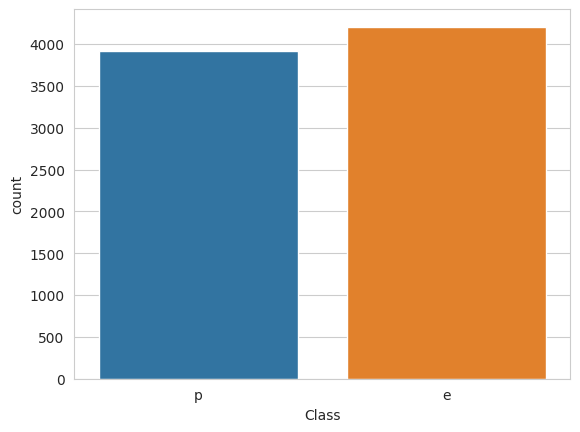

In [ ]:
sns.countplot(data=mushroom, x='Class', palette=sns.color_palette())
#Due to our two classifcation values, this is a suitable representation

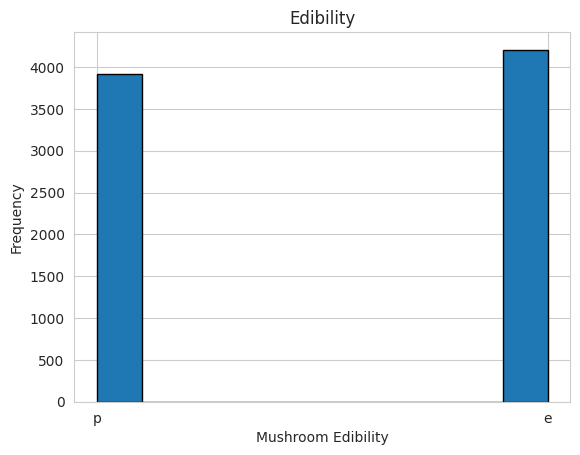

In [ ]:
plt.hist(mushroom['Class'], histtype='bar', edgecolor='black')

plt.xlabel('Mushroom Edibility')
plt.ylabel('Frequency')
plt.title('Edibility')
plt.show()

#Histogram is not a suitable representation for this dataset.
#Box plot is also not suitable

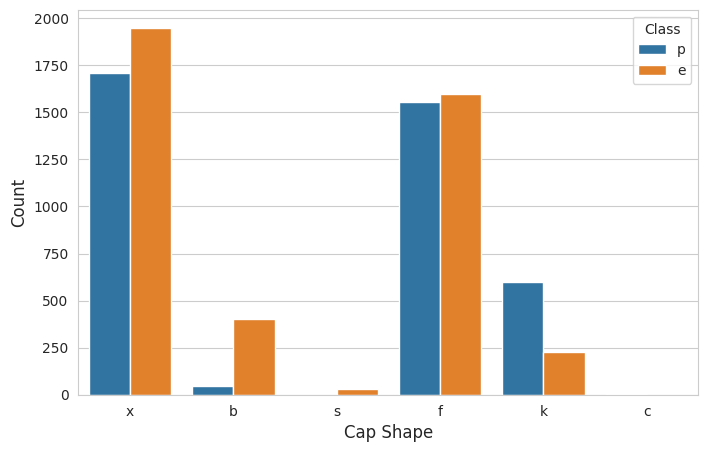

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Cap_Shape',
              hue='Class',
              data=mushroom)
plt.xlabel('Cap Shape', size=12)
plt.ylabel('Count', size=12)
plt.show()

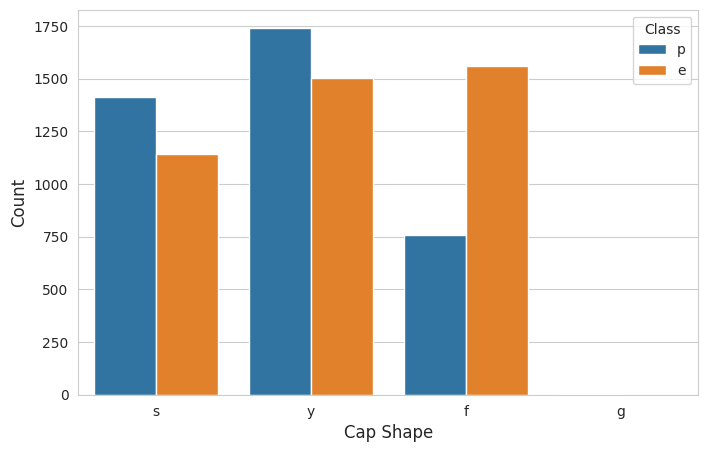

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Cap_Surface',
              hue='Class',
              data=mushroom)
plt.xlabel('Cap Shape', size=12)
plt.ylabel('Count', size=12)
plt.show()

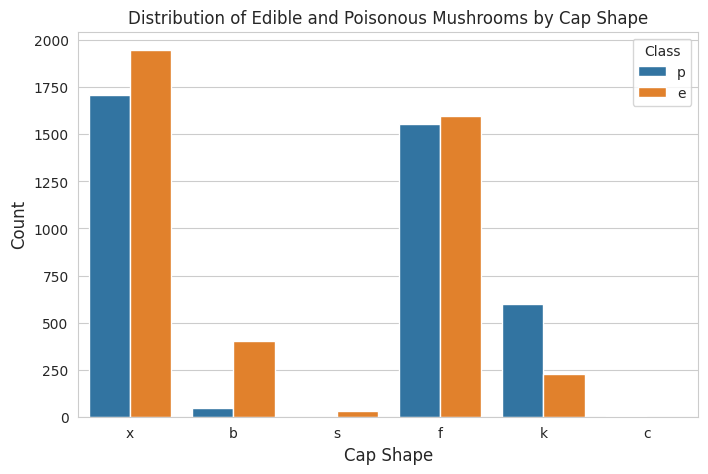

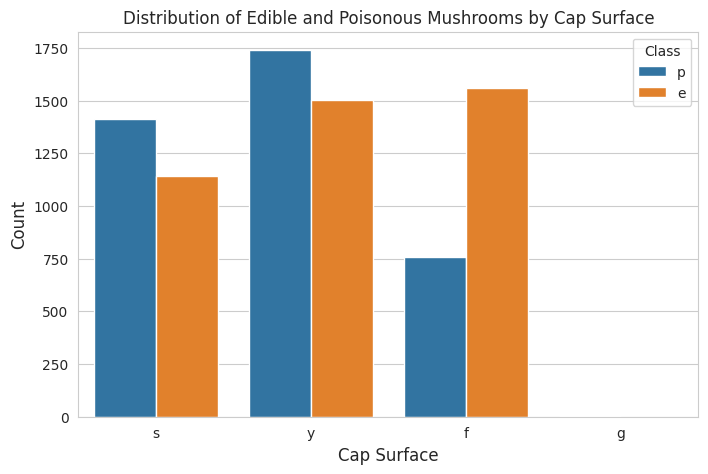

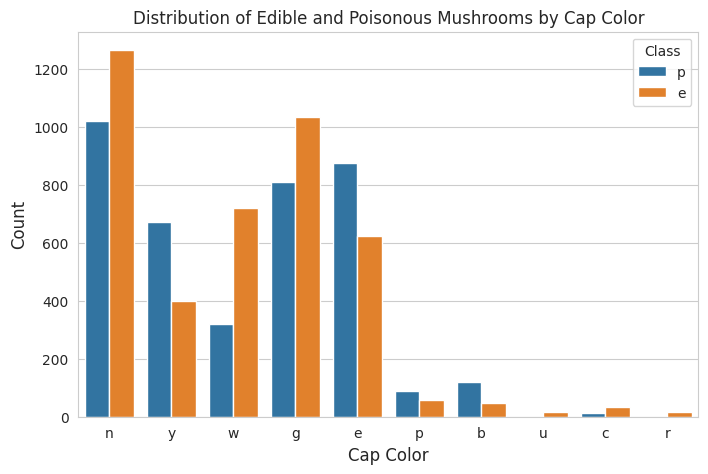

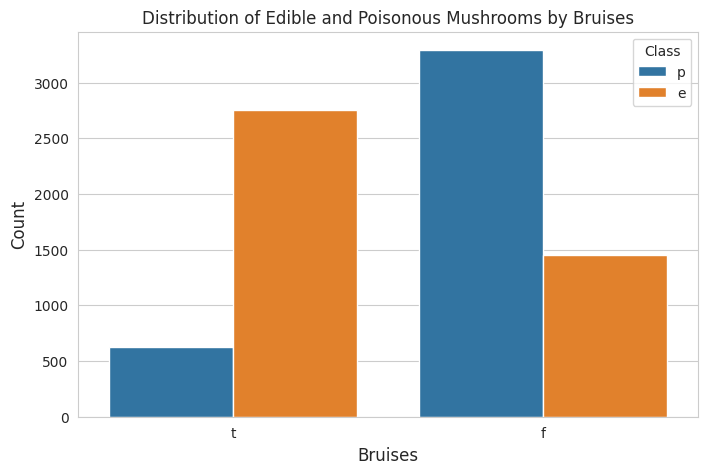

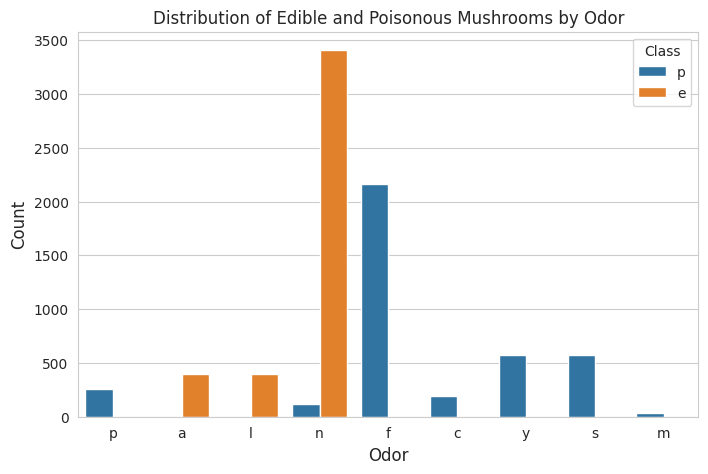

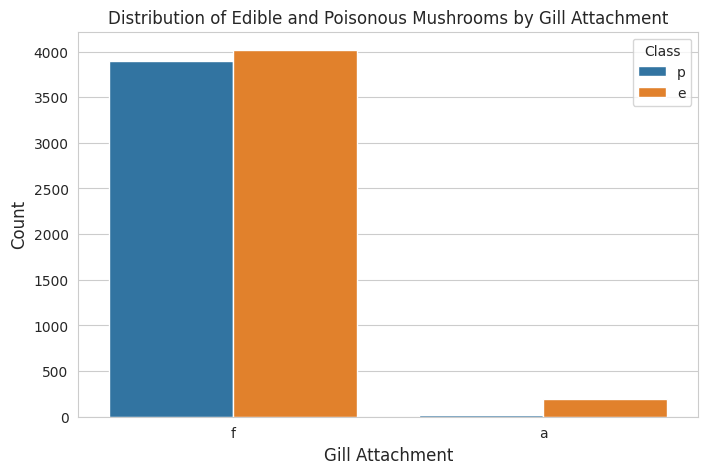

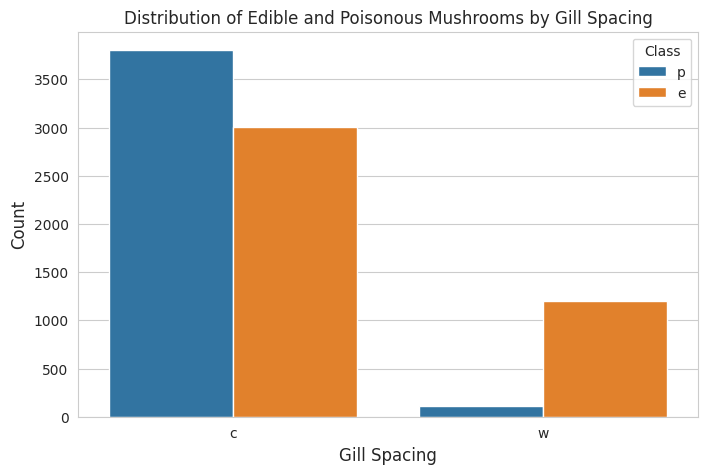

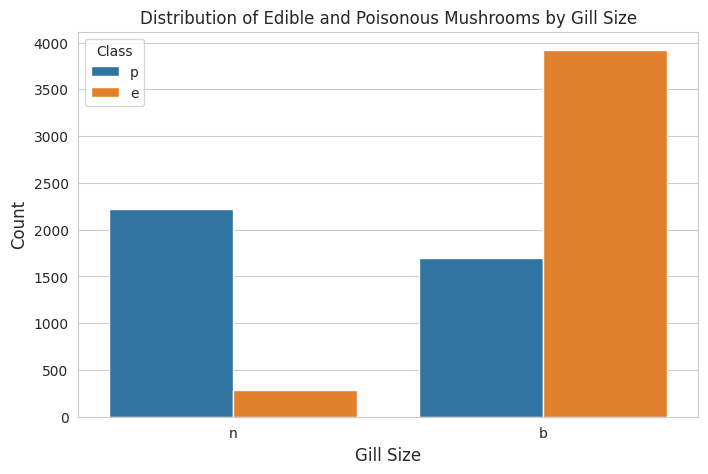

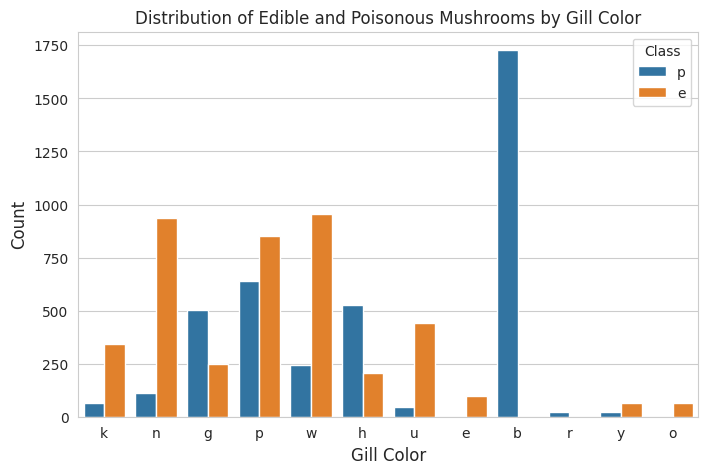

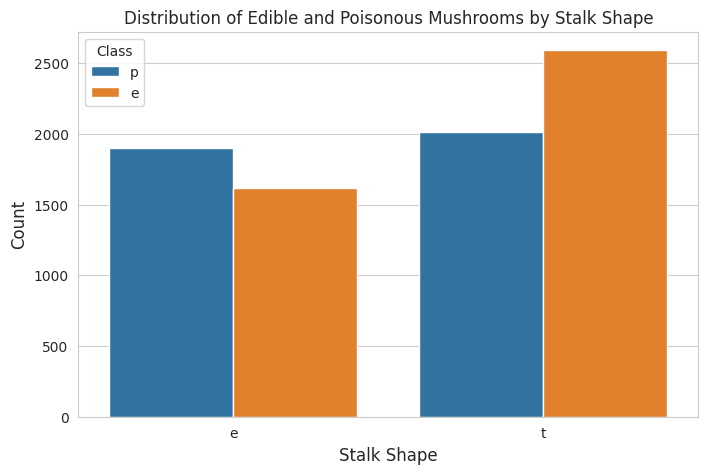

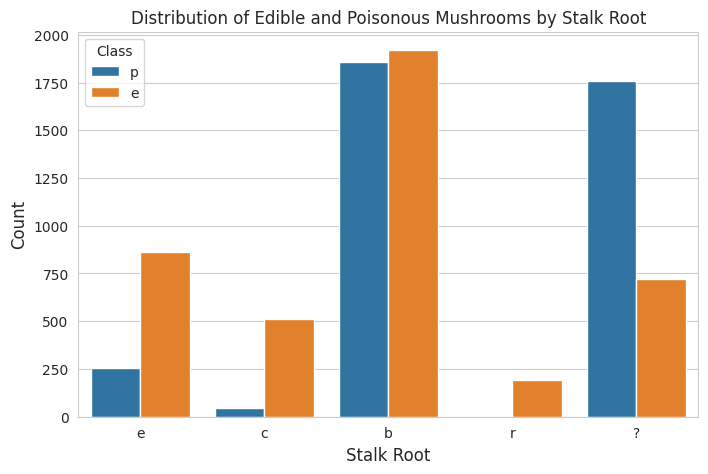

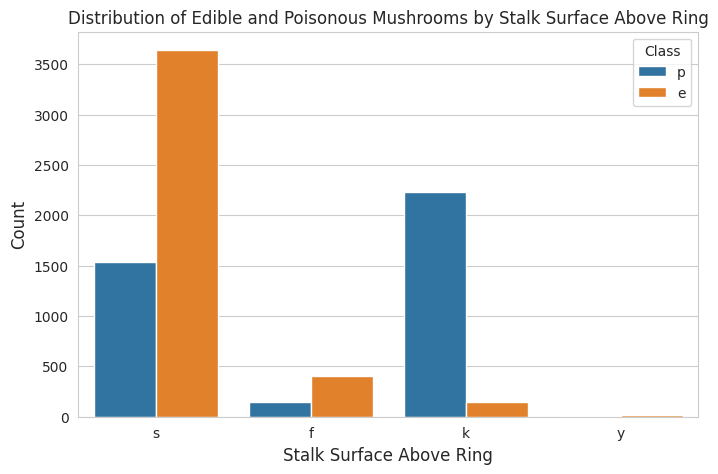

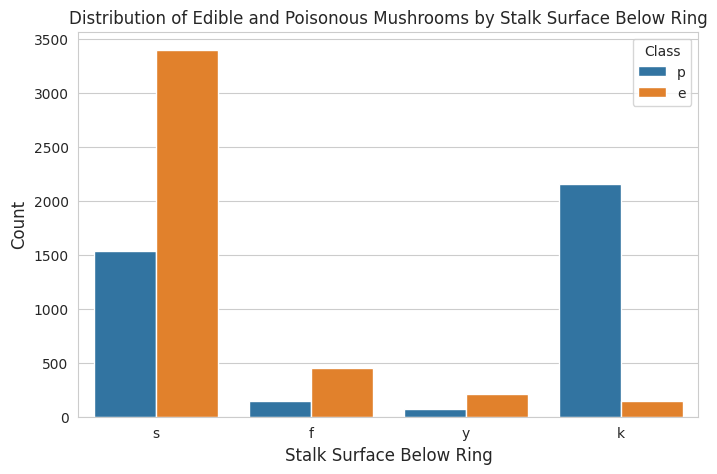

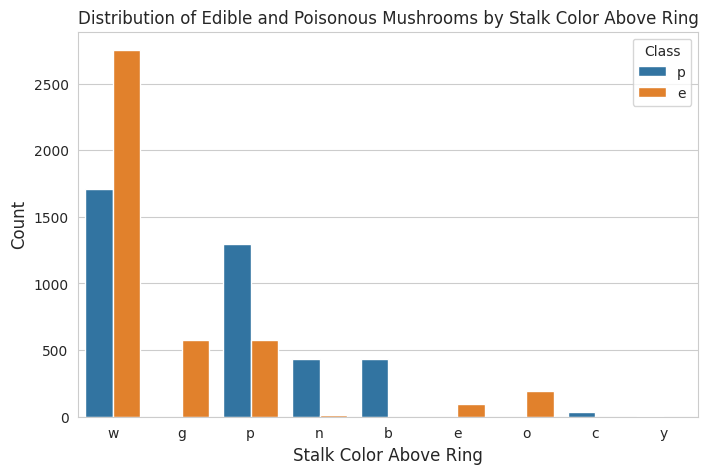

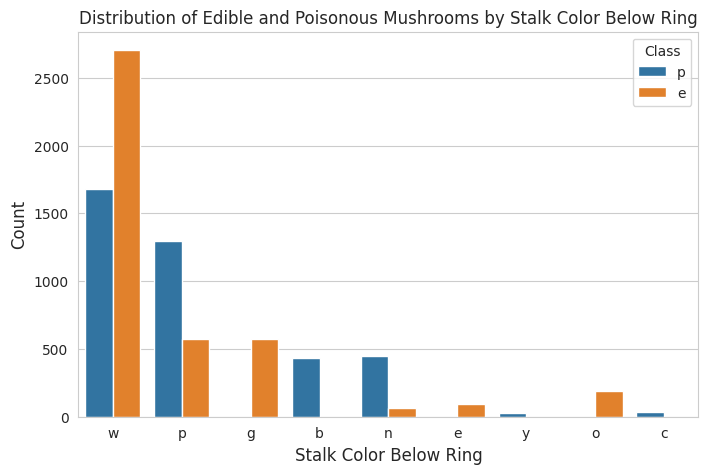

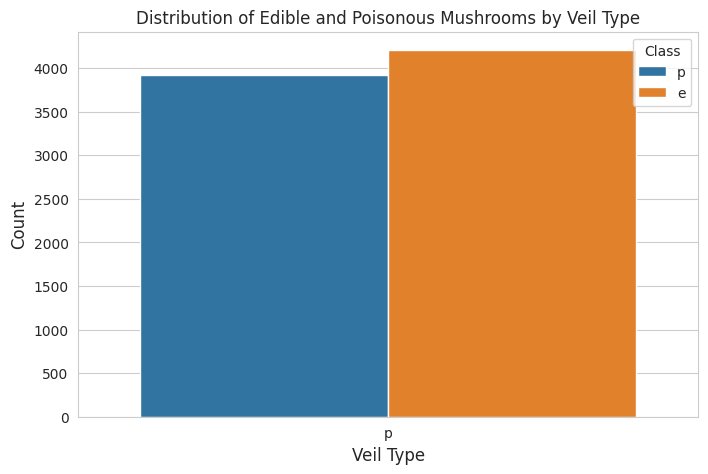

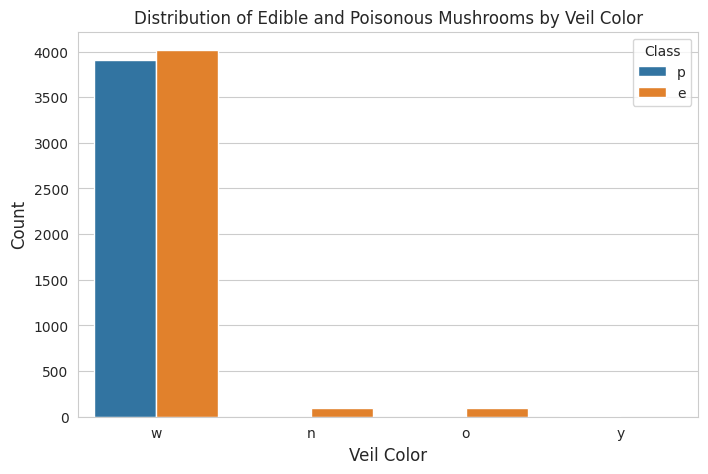

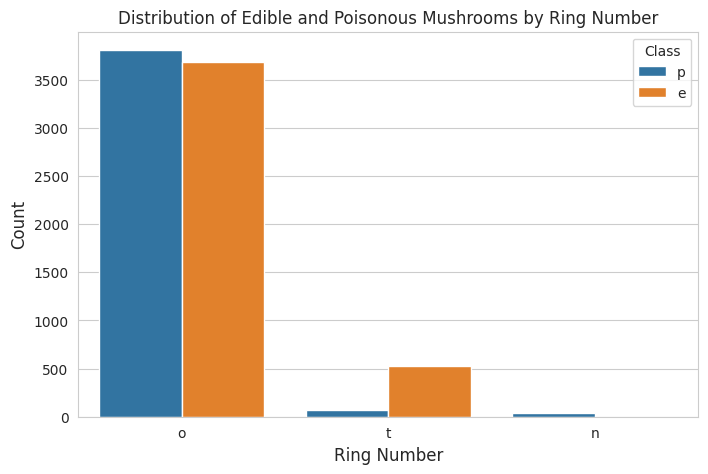

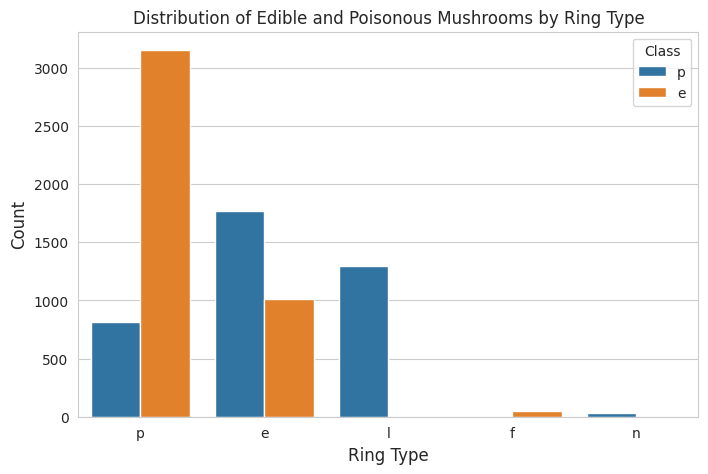

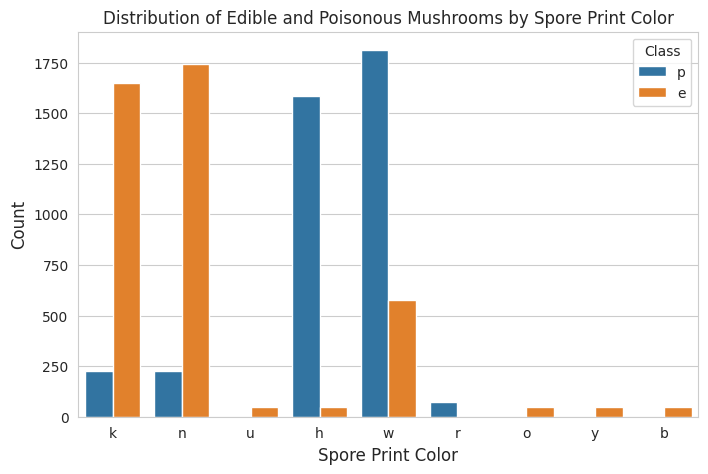

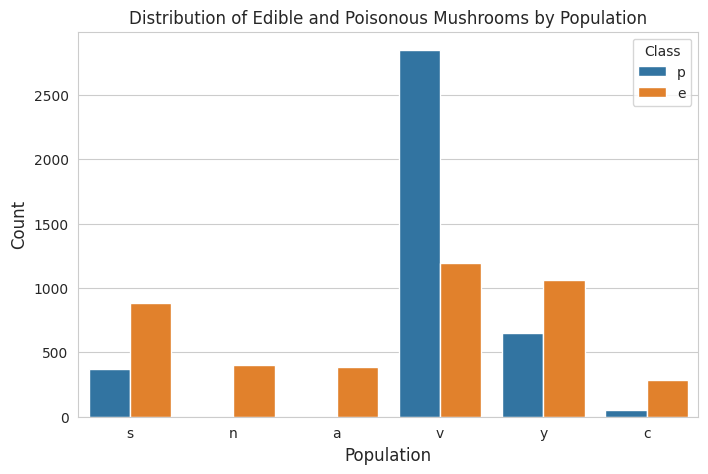

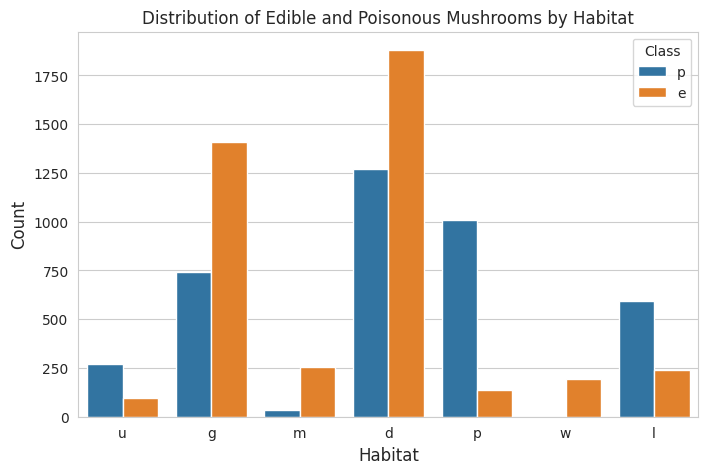

In [ ]:
def plot_categorical_features(df, columns_to_plot):

    for col in columns_to_plot:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=col, hue='Class', data=df)
        plt.xlabel(col.replace('_', ' ').title(), size=12)
        plt.ylabel('Count', size=12)
        plt.title(f'Distribution of Edible and Poisonous Mushrooms by {col.replace("_", " ").title()}')
        plt.show()

# Get the list of categorical columns excluding the target variable
categorical_cols = mushroom.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Class')

# Plot countplots for all categorical columns
plot_categorical_features(mushroom, categorical_cols)

# **Secion3: Data Preprocessing and Cleaning**

In [ ]:
# Check skewness for mushrooms dataset

import pandas as pd

# Load dataset
mushroom = pd.read_csv("/content/sample_data/mushrooms.csv")

# Display column names to confirm
print("Columns:", mushroom.columns.tolist())

# Convert a categorical column to numeric (e.g., 'class')
mushroom['class_encoded'] = mushroom['class'].astype('category').cat.codes

# Check skewness and 99th percentile for the encoded column
print("Skewness:", mushroom['class_encoded'].skew())
print("Outliers (99th percentile):", mushroom['class_encoded'].quantile(0.99))

Columns: ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
Skewness: 0.0719455344548018
Outliers (99th percentile): 1.0


In [ ]:
mushroom.dtypes
# or
mushroom.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
mushroom.isnull().sum()


,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


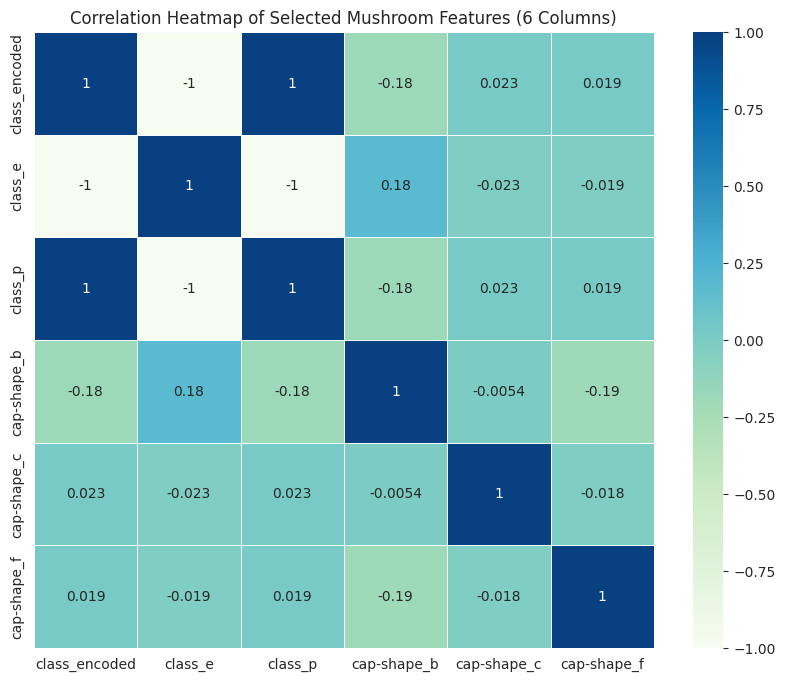

In [ ]:
# Convert categorical features to numerical using one-hot encoding
mushroom_encoded = pd.get_dummies(mushroom)

# Select only 6 columns to view correlation clearly
selected_cols = mushroom_encoded.columns[:6]   # choose first 6 columns
# You can also manually pick specific ones, e.g.:
# selected_cols = ['class_p', 'cap-shape_x', 'cap-surface_s', 'cap-color_n', 'odor_a', 'gill-color_k']

corr = mushroom_encoded[selected_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='GnBu', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Mushroom Features (6 Columns)')
plt.show()

The heatmap proves to be an inadiquate representation of the data so instead a far better suited barplot is used to the same end


/tmp/ipython-input-3279811299.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=final_correlations.values, y=final_correlations.index, palette='coolwarm')


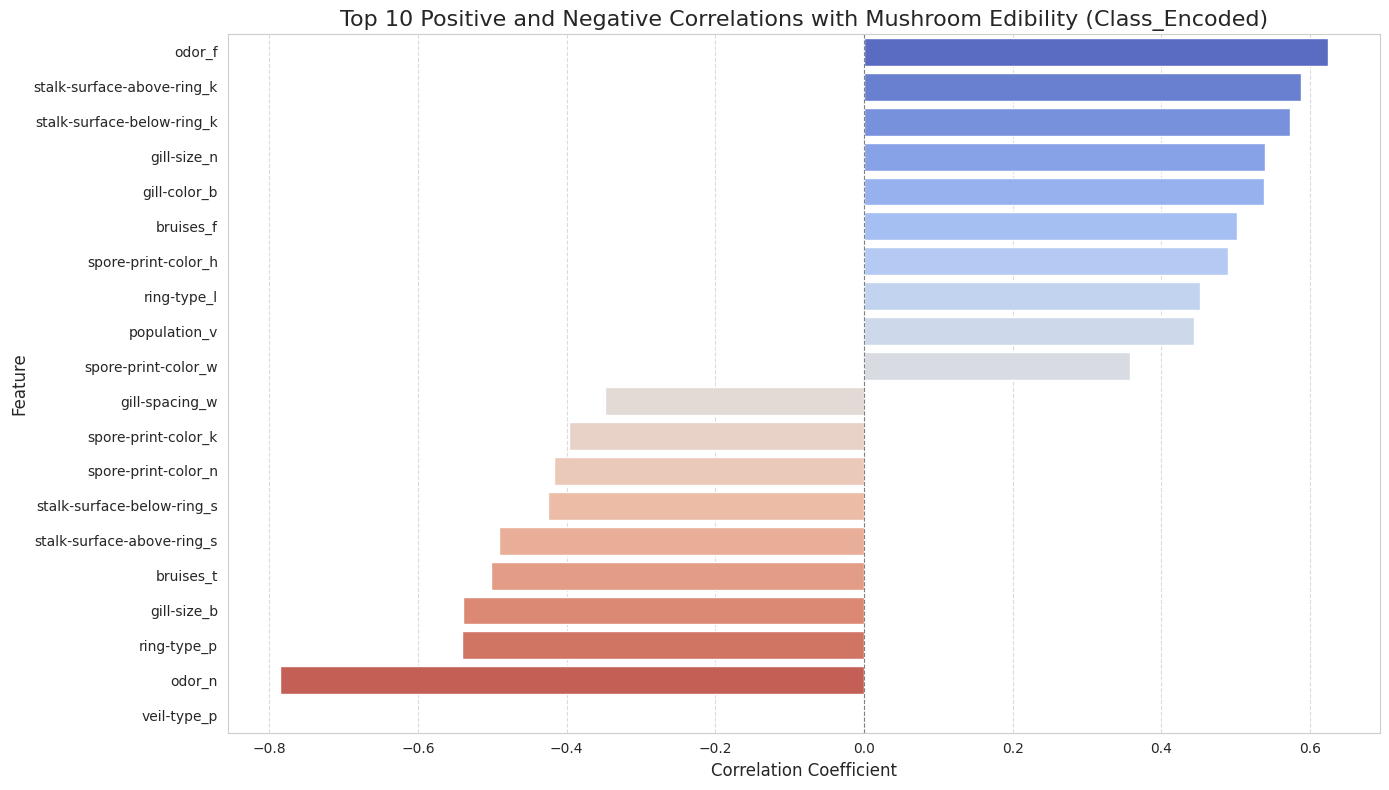

In [ ]:

# Reload the dataset to ensure 'class' is present for encoding
mushroom_df = pd.read_csv('/content/sample_data/mushrooms.csv')
mushroom_df['class_encoded'] = mushroom_df['class'].astype('category').cat.codes

df_for_correlation = mushroom_df.drop(columns=['class'], errors='ignore')
df_encoded = pd.get_dummies(df_for_correlation.drop(columns=['class_encoded']))

# Add the target variable back
df_encoded['class_encoded'] = df_for_correlation['class_encoded']

# Calculate the correlation of all features
correlations = df_encoded.corr()['class_encoded'].sort_values(ascending=False)

# Drop the self-correlation of 'class_encoded' with itself
correlations = correlations.drop('class_encoded')

# Select top 10 most positively correlated and top 10 most negatively correlated features
top_n = 10
top_positive_correlations = correlations.head(top_n)
top_negative_correlations = correlations.tail(top_n)
final_correlations = pd.concat([top_positive_correlations, top_negative_correlations])

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x=final_correlations.values, y=final_correlations.index, palette='coolwarm')
plt.title('Top 10 Positive and Negative Correlations with Mushroom Edibility (Class_Encoded)', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.8) # Add a vertical line at 0 for clarity
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_encoded
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,1
1,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,0
2,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,0
3,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,1
4,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,0


In [ ]:
mushroom['class'].value_counts()


,count
class,
e,4208
p,3916


In [ ]:
mushroom['class_encoded'].value_counts()

,count
class_encoded,
0,4208
1,3916


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
mushroom['class_encoded'] = le.fit_transform(mushroom['class'])
mushroom['class_encoded'].value_counts()


,count
class_encoded,
0,4208
1,3916


In [ ]:
mushroom.isnull().sum()


,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


# **Section4: Model Training**


Random Forest Model Classifcation:


In [ ]:
mushroom['class_encoded'].head()

,class_encoded
0,1
1,0
2,0
3,1
4,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = mushroom_df.drop(columns=['class', 'class_encoded', 'odor', 'spore-print-color', 'gill-size', 'stalk-surface-below-ring'])
# Remove target data and causes of data leakage

y = mushroom_df['class_encoded'] # Target
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Random Forest Classifier**

In [ ]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



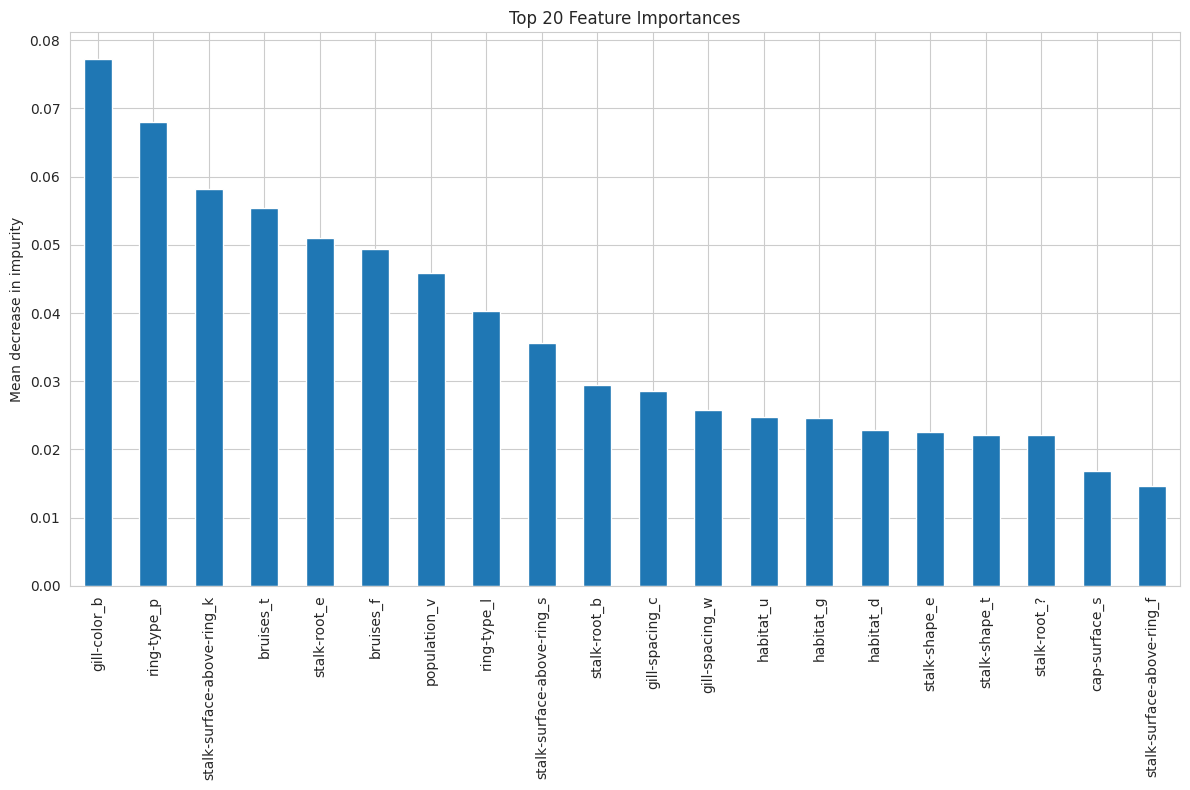

In [ ]:
# This graph plots the most important features to hopefully point out any data leakage

# Graph revealed extra variables, 'class_e' and 'class_p' were causing issues

importances = rf_classifier.feature_importances_
feature_names = X.columns

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(12, 8))
forest_importances.sort_values(ascending=False).head(20).plot.bar(ax=ax)
ax.set_title("Top 20 Feature Importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()


# **Logistical** **Regression**

In [ ]:
# Logistical Regression training

lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)

In [ ]:
# Logistical Regression Report

print("Classification Report:\n")
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred_lr))

Classification Report:

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       843
           1       0.99      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



# **Decision** **Tree**

In [ ]:
# Decision Tree Training

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

In [ ]:
# Decision Tree Report

DecisionTreeClassifier(max_depth=5, random_state=42)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print("\nDecision Tree Classification Report:\n", dt_report)

Decision Tree Accuracy: 1.00

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



# **Section5: Model Evaluation**

*   List item
*   List item



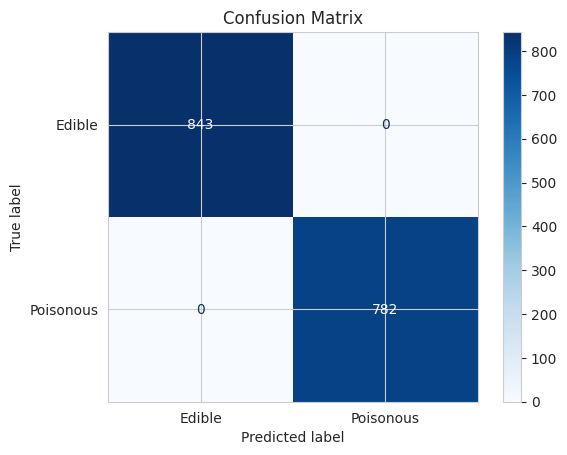

In [ ]:
# Random Forest Classifier

# Use y_test (true labels) and y_pred (predicted labels) from previous steps
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Edible', 'Poisonous'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

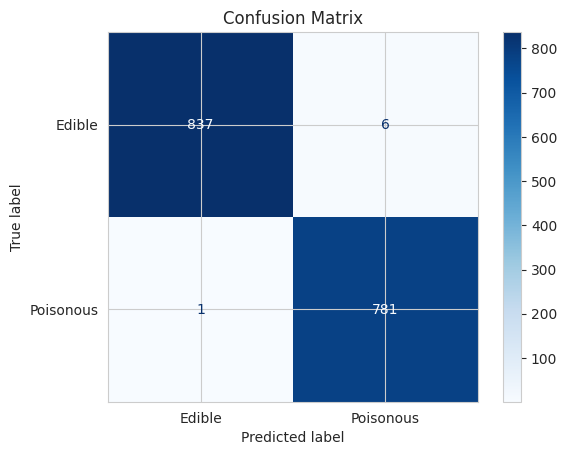

In [ ]:
# Logistical Regression

cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Edible', 'Poisonous'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

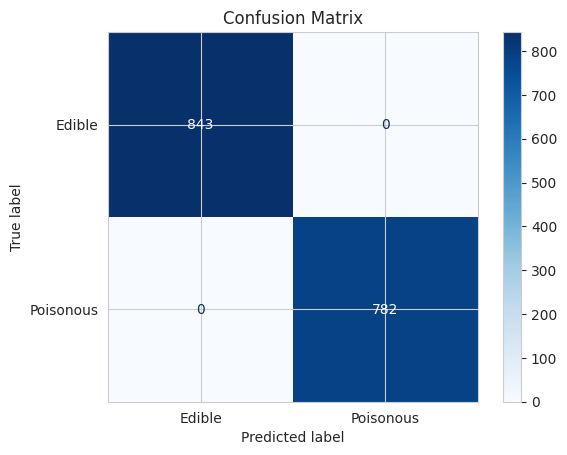

In [ ]:
# Decision Tree

cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Edible', 'Poisonous'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Suggested Datasets:

--


### Public Datasets with Download Links

These offer more realistic, messy data for deeper experimentation:

####  Classification
- [**Titanic Dataset**](https://www.kaggle.com/c/titanic/data) – Predict survival based on passenger features.
- [**Heart Disease Dataset**](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset) – Binary classification with medical features.
- [**Mushroom Classification Dataset**](https://www.kaggle.com/datasets/uciml/mushroom-classification) – classification of mushrooms.
- [**Breast Cancer Dataset**](https://www.kaggle.com/datasets/reihanenamdari/breast-cancer) – Binary classification with medical features.
- [**Student Alcohol Consumption Dataset**](https://www.kaggle.com/datasets/reihanenamdari/breast-cancer) – multi-classification task.
- [**Credit Card Prediction**](https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction) – Classification task to predict if a client can have a credit card.
- [**Bank Marketing Dataset**](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) – Predict if a client will subscribe to a term deposit. Includes categorical and temporal features.

#### Regression

- [**Student Performance Dataset**](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data) – Predict final grades based on demographic and school-related features.
- [**Medical Cost Dataset**](https://www.kaggle.com/datasets/mirichoi0218/insurance) – Predict insurance charge.
- [**Bike Sharing Dataset**](https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset) – Predict the share of bikes.
- [**Salary Prediction**](https://www.kaggle.com/datasets/amirmahdiabbootalebi/salary-by-job-title-and-country) – Predict Salary for employers
- [**Medical Cost Personal Dataset**](https://www.kaggle.com/datasets/mirichoi0218/insurance) – Predict insurance charges based on age, BMI, smoking status, etc..

---




